# Project 1 - TMDb movie data

## Table of contents

 1. Introduction

 2. Data Wrangling

  - Gather

  - Assess and Clean

 3. Data Exploration

 4. Conclusion

 5. References

 

### 1. Introduction

 I used the TMDb movie data dataset, which is actually available under the following URL https://www.kaggle.com/tmdb/tmdb-movie-metadata. 

 

The source says the dataset contains round about 5000 lines which include in each case a movie with 21 columns of different data.

After the preliminary perusal of data, the following columns seem to be the most suitable to generate questions:

 - popularity

 - budget

 - revenue

 - cast

 - director

 - runtime

 - genres

 - production_companies

 - release_date

 - vote_count

 - vote_average

 - release_year

 - budget_adj

 - revenue_adj

### 2. Data Wrangling
#### Gather

In [117]:
# Import necessary libraries - Gather
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [118]:
# Import dataset - Gather
df=pd.read_csv("tmdb-movies.csv")

### Assess and Clean

In [119]:
# Count of rows and columns - Assess [1]
df.shape

(10866, 21)

In [120]:
# Inspect head of DataFrame - Assess [2]
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [121]:
# Check number of unique values per columns over rows - Assess [3]
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [122]:
# Rudimentary overview about index dtype and columns, non-null values and memory usage. - Assess [4]
df.info

<bound method DataFrame.info of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4               

In [123]:
# Adjust the column titels - Clean [5]
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

Decide which columns I will use for investigation, of which category their values are and how to handle missing values [6]

Column | Category
------- | -------
~id~ | ND
**imdb_id** | ND
**popularity** | ND
**budget** | ND
**revenue** | ND
~original_title~ | CO
~cast~ | CO
~homepage~ | CO
~director~ | CO
~tagline~ | CO
~keywords~ | CO
~overview~ | CO
**runtime** | ND
~genres~ | CO
~production_companies~ | CO
**release_date** | NC
**vote_count** | ND
**vote_average** | NC
**release_year** | ND
~budget_adj~ | ND
~revenue_adj~ | ND

In [124]:
# Drop columns not needed to answer questions
# and confirm the result checking for missing values in the step after  - Clean [7]
df.drop(df.columns[[0,5,6,7,8,9,10,11,13,14,19,20]], axis = 1, inplace = True)

In [125]:
# Check for missing values - Assess [8]
df.isnull().sum()

imdb_id         10
popularity       0
budget           0
revenue          0
runtime          0
release_date     0
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [126]:
# Check isnull - Assess [8]
df[df.isnull() == True]

,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Drop all empty rows with creating a filtered DataFrame [8]
filtered_df = df[df['imdb_id'].notnull()]

In [128]:
# Confirm the DataFrame has no empty value rows anymore [8]
filtered_df.isnull().sum().sum()

0

In [129]:
# Confirm the DataFrame has no empty value rows anymore - Assess [8]
filtered_df.isna().sum()

imdb_id         0
popularity      0
budget          0
revenue         0
runtime         0
release_date    0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [130]:
# Check Dataframe size [8]
filtered_df.shape

(10856, 9)

In [131]:
# Reset the index in case For-loops are needed and confirm [9]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...
10851,tt0060371,0.080598,0,0,95,6/15/66,11,7.4,1966
10852,tt0060472,0.065543,0,0,176,12/21/66,20,5.7,1966
10853,tt0060161,0.065141,0,0,94,1/1/66,11,6.5,1966
10854,tt0061177,0.064317,0,0,80,11/2/66,22,5.4,1966


In [132]:
# Checkformat of columns - Assess [9]
filtered_df.dtypes

imdb_id          object
popularity      float64
budget            int64
revenue           int64
runtime           int64
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
dtype: object

In [133]:
# Further investigation of spefic column formats - Assess [9]
type(filtered_df['release_date'][0])

str

In [134]:
# Strip whitespaces in column - Clean [9]
filtered_df.release_date = filtered_df.release_date.str.strip()

In [135]:
# Correct column formats for further analyse - Clean [9]
for i in filtered_df.index:
    filtered_df.loc[i, 'release_date'] = pd.to_datetime(filtered_df.loc[i, 'release_date'],format='%m/%d/%y')

In [136]:
# Confirm correction - Assess [9]
type(filtered_df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [137]:
# View changings [9]
filtered_df.head(5)

,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,124,2015-06-09 00:00:00,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,120,2015-05-13 00:00:00,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,119,2015-03-18 00:00:00,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,136,2015-12-15 00:00:00,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,137,2015-04-01 00:00:00,2947,7.3,2015


In [138]:
# Check for duplicates - Assess [10]
sum(filtered_df.duplicated())

1

In [139]:
# Check duplicates - Assess [10]
filtered_df[filtered_df.duplicated() == True]

,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
2086,tt0411951,0.59643,30000000,967000,92,2010-03-20 00:00:00,110,5.0,2010


In [140]:
# Confirm what I just found - Assess [10]
filtered_df[filtered_df['imdb_id'] == 'tt0411951']

,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
2085,tt0411951,0.59643,30000000,967000,92,2010-03-20 00:00:00,110,5.0,2010
2086,tt0411951,0.59643,30000000,967000,92,2010-03-20 00:00:00,110,5.0,2010


In [141]:
# Drop duplicates if necessary - Clean [10]
filtered_df.drop_duplicates(inplace=True)

In [142]:
# Re-Check for duplicates - Assess [10]
sum(filtered_df.duplicated())

0

In [143]:
# Save cleaned Dataset
filtered_df.to_csv('df_clean.csv', index=False)

After loading the dataset the first steps I take is getting a quick overview of the set, how "it looks like", the size, the formats and identify what has to be done for a propoer analyse in case of missing values, wrong formats and other.
 1. Checking the size
 2. Have a look on the first rows
 3. Check the variability of the values per column
 4. Rudimentary overview about index dtype and columns, non-null values and memory usage
 5. Adjust the column titles to avoid possible further problems
 6. Decide which columns I use for my investigation cathegorize them based on
   - Numeric 
     - Continuous [NC]
     - Discrete [ND]
   - Categorical
     - Binary [CB]
     - Ordinally scaled [CO]
     
     and decide how to handle missing values
     
     
 7. Drop not needed columns
 8. Check for missing values
  - Fill/correct missing values
  - Confirm correction
  
 9. Check the format of the columns
  - Correct wrong formats
  - Strip whitespaces in columns if necessary
  - Confirm correction
  
 10. Check for duplicates
  - Erase duplicates
  - Confirm corrections



## 3 Data Exploration
 
 1. How did the earnings per movie envelope over the years?
 2. How dit the budget correlate to the popularity over the years?
 3. How did the vote_average affected the popularity and the runtime over the years?
 4. How does the season impact the popularity over the years?

In [144]:
# Re-Import necessary libraries in case of restarted kernel - Gather
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import datetime

### 1. How did the earnings per movie envelope over the years?

To check this I will substract the `budget` from the `revenue`column and run it over the `release_year`.

In [145]:
# Import dataset - Gather
df_1=pd.read_csv("df_clean.csv")

In [146]:
# Drop not needed columns
df_1.drop(df_1.columns[[0,1,4,5,6,7]], axis = 1, inplace = True)

In [147]:
# Add column for earnings based on budget and revenue
df_1['earnings'] = df_1.apply(lambda x: x['revenue'] - x['budget'], axis=1)

In [148]:
# Drop budget and revenue columns
df_1.drop(df_1.columns[[0,1]], axis = 1, inplace = True)

In [149]:
# Confirm - Assess
df_1.head(20)

,release_year,earnings
0,2015,1363528810
1,2015,228436354
2,2015,185238201
3,2015,1868178225
4,2015,1316249360
5,2015,397950503
6,2015,285603537
7,2015,487380321
8,2015,1082730962
9,2015,678708609


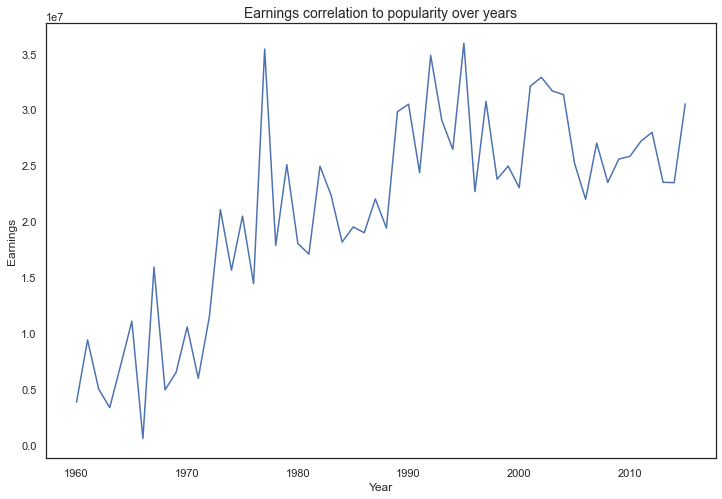

In [150]:
# Plot - Explore
x_axis = df_1.set_index('release_year')
y_axis = df_1.groupby('release_year').mean()

F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)

plt.xlabel("Year", size=12)
plt.ylabel("Earnings", size=12)
plt.title("Earnings correlation to popularity over years", size=14)

plt.plot(y_axis)
plt.show()

#### Communicating plot

The mean earnings for the movies increased strong from 1970 to 1980.

After this the profit is only increasing smoothly if not stagnating.

### 2. How did the budget correlate to the popularity over the years?

In [151]:
# Import dataset - Gather
df_2=pd.read_csv("df_clean.csv")
df_2.head()

,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,124,2015-06-09 00:00:00,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,120,2015-05-13 00:00:00,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,119,2015-03-18 00:00:00,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,136,2015-12-15 00:00:00,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,137,2015-04-01 00:00:00,2947,7.3,2015


In [152]:
# Drop needed columns
df_2.drop(df_2.columns[[0,3, 4,5,6,7]], axis = 1, inplace = True)
df_2.head()

,popularity,budget,release_year
0,32.985763,150000000,2015
1,28.419936,150000000,2015
2,13.112507,110000000,2015
3,11.173104,200000000,2015
4,9.335014,190000000,2015


In [153]:
# View the min, 25%, 50%, 75%, max popularity values with Pandas describe
df_2.describe()['popularity']

count    10855.000000
mean         0.646832
std          1.000591
min          0.000065
25%          0.207733
50%          0.383998
75%          0.714446
max         32.985763
Name: popularity, dtype: float64

In [154]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 0.000065,0.207733 ,0.383998 ,0.714446 , 32.985763] # Fill in this list with the five values you just found before

# Labels for the four COLUMN_to_check level groups
bin_names = [
'Low', 'Medium', 'Moderately High' ,'High' ] # Name each acidity level category

# Creates COLUMN-to_check_levels column
df_2['popularity_to_check_levels'] = pd.cut(df_2['popularity'], bin_edges, labels=bin_names)

In [155]:
# Confirm changes
df_2.head()

,popularity,budget,release_year,popularity_to_check_levels
0,32.985763,150000000,2015,High
1,28.419936,150000000,2015,High
2,13.112507,110000000,2015,High
3,11.173104,200000000,2015,High
4,9.335014,190000000,2015,High


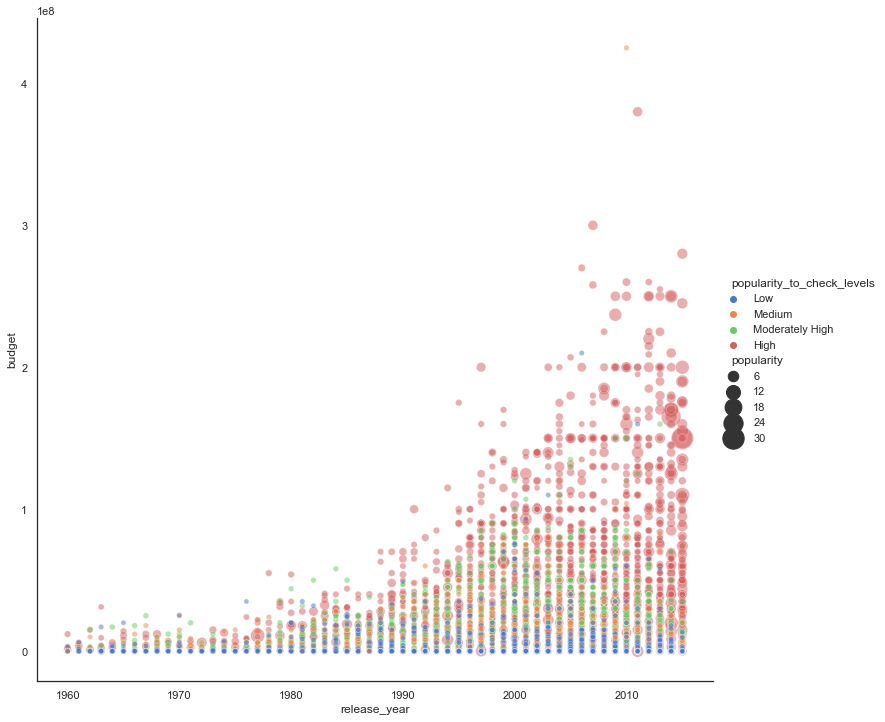

In [156]:
sns.set_theme(style="white")

sns.relplot(x="release_year", y="budget", hue="popularity_to_check_levels", size="popularity",
            sizes=(25, 500), alpha=.5, palette="muted",
            height=10, data=df_2)

#### Communicating plot

The impact from the budget on the popularity seems to increase at the end of the release years in the data.

We can see a popular movie at the end of the 80s, with a lower budget and also some high budget movies with a low popularity beginning from 2000.

###  3. How did the vote_average affected the popularity and the runtime over the years?

In [158]:
# Import dataset - Gather
df_3=pd.read_csv("df_clean.csv")
#df_3.head()

In [159]:
# Drop not needed columns
df_3.drop(df_3.columns[[0,2,3,5,6]], axis = 1, inplace = True)
df_3.head()

,popularity,runtime,vote_average,release_year
0,32.985763,124,6.5,2015
1,28.419936,120,7.1,2015
2,13.112507,119,6.3,2015
3,11.173104,136,7.5,2015
4,9.335014,137,7.3,2015


In [160]:
# Delete rows with runtime = 0
df_3=df_3[df_3['runtime'] != 0]

In [161]:
# View the min, 25%, 50%, 75%, max popularity values with Pandas describe
df_3.describe()['runtime']

count    10824.000000
mean       102.397635
std         30.912960
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [162]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2,90 ,99 ,112 , 900] # Fill in this list with the five values you just found before

# Labels for the four COLUMN_to_check level groups
bin_names = [
'Low', 'Medium', 'Moderately High' ,'High' ] # Name each acidity level category

# Creates COLUMN-to_check_levels column
df_3['runtime_to_check_levels'] = pd.cut(df_3['runtime'], bin_edges, labels=bin_names)

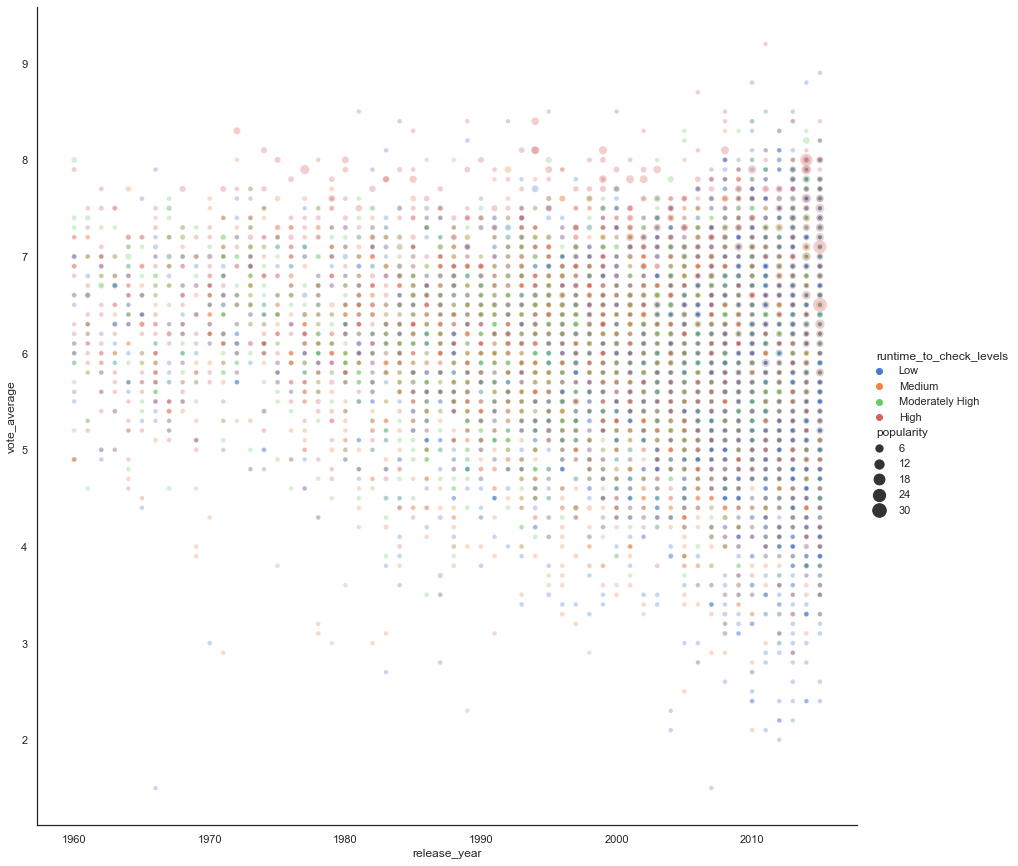

In [163]:
sns.set_theme(style="white")

sns.relplot(x="release_year", y="vote_average", hue="runtime_to_check_levels", size="popularity",
            sizes=(20, 200), alpha=.3, palette="muted",
            height=12, data=df_3)

#### Communicating plot

In the beginning of the data, the voting behavior of the people had a small variability. With the years it was more spreading form much lower than also to higher.

We can also see an increasing of the count of shorter runtimes, maybe more going to lower voting but probably of course showing that movies got taken out of the cinemas when the popularity decreased.

We see movies with a higher popularity in the higher voting average zone.

###  4. How does the season impact the popularity over the years?

In [164]:
# Import dataset - Gather
df_4=pd.read_csv("df_clean.csv")
#df_4.head()

In [165]:
# Drop not needed columns - Clean
df_4.drop(df_4.columns[[0,2,3,4,6,7,]], axis = 1, inplace = True)
df_4.head()

,popularity,release_date,release_year
0,32.985763,2015-06-09 00:00:00,2015
1,28.419936,2015-05-13 00:00:00,2015
2,13.112507,2015-03-18 00:00:00,2015
3,11.173104,2015-12-15 00:00:00,2015
4,9.335014,2015-04-01 00:00:00,2015


In [166]:
# Confirm changes - Assess
df_4.dtypes

popularity      float64
release_date     object
release_year      int64
dtype: object

In [167]:
# Correct column formats for further analyse
for i in df_4.index:
    df_4.loc[i, 'release_date'] = pd.to_datetime(df_4.loc[i, 'release_date'])

In [168]:
# Check format of date
type(df_4['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [169]:
# method to get the season - Assess
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start=year+'-03-21', end=year+'-06-20'),
               'summer': pd.date_range(start=year+'-06-21', end=year+'-09-22'),
               'fall': pd.date_range(start=year+'-09-23', end=year+'-12-20')}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['fall']:
        return 'fall'
    else:
        return 'winter'

In [170]:
# Create a new column with the season the movie was released - Clean
df_4['season'] = df_4['release_date'].apply(season_of_date)

In [171]:
# Confirm - Assess
df_4.head()


,popularity,release_date,release_year,season
0,32.985763,2015-06-09 00:00:00,2015,spring
1,28.419936,2015-05-13 00:00:00,2015,spring
2,13.112507,2015-03-18 00:00:00,2015,winter
3,11.173104,2015-12-15 00:00:00,2015,fall
4,9.335014,2015-04-01 00:00:00,2015,spring


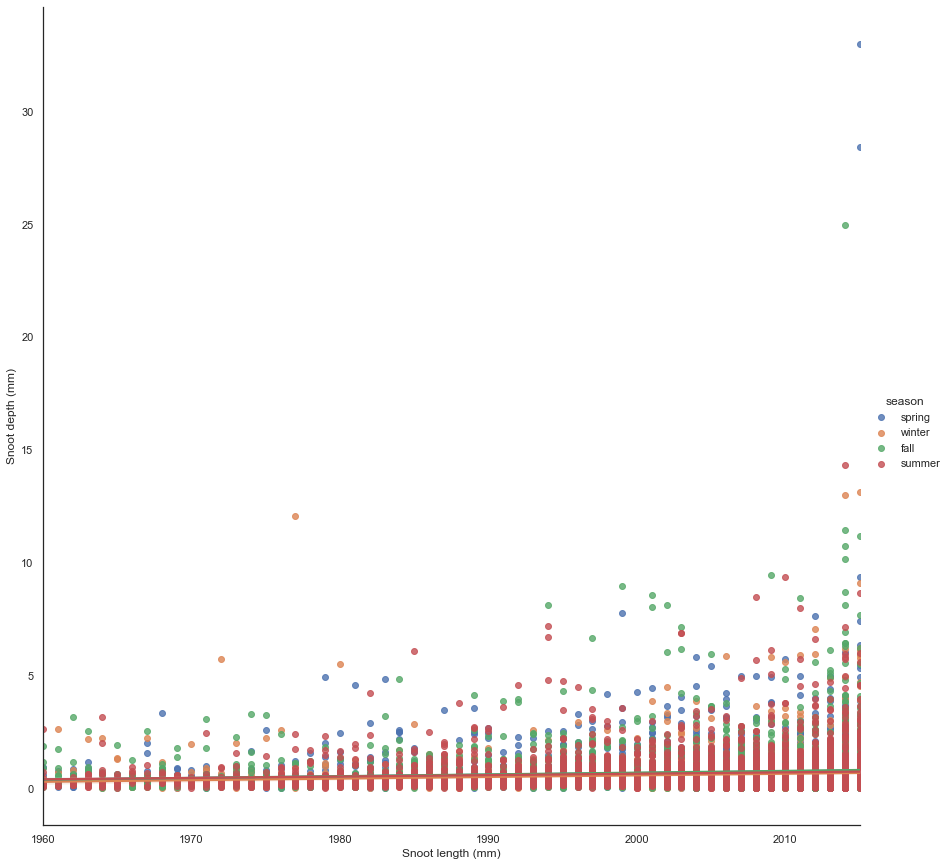

In [172]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df_4,
    x="release_year", y="popularity", hue="season",
    height=12
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

#### Communicating plot

It is difficult to see but regarding to linear regression while the popularity of watching movies increased over the years it changed from summer to fall.

Winter is less popular over all times, and we have several outliers in summer over the years.

### 4. Conclusion

My 4 questions investigate the dataset in a view over the entire time frame.

I notice that the variability of the voting behavior increases over the years.

It is interesting to see how the linear regression of the count of people going to the cinema changes from summer to fall over the last 50 years.

The reaction of the market seems to be faster in its reaction regarding to the runtime of movies with lower voting average.

Limitations

The number of missing values was tiny in relation to the whole dataset, so there was a low impact of the outcome from this variable.

Additional information on how the data was collected would be helpful in interpreting data affected by the opinion of the people like the vote average.

I noticed I had to convert the format again in the cleaned dataset after re-importing it for my last question. We should keep this in mind as I guess the reason is the .csv format of the file.

### 5. References

 - https://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime

 - stackoverflow.com

 - dataquest.io

 - geeksforgeeks.org

 - pandas.pydata.org

 - github.com

 - devdoc.net

 - w3resource.com